In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import hyperobjects as ho
from pycapacity.algorithms import iterative_convex_hull_method
from pycapacity.objects import Polytope
from pycapacity.visual import plot_polytope
import opensim as osim
from common import *

SUBJECT_ID = 163
subject_folder = f"C://Users//glaisne//Documents//force_experimentation_data//subject_{SUBJECT_ID}"

a = np.pi / 180.0

model_path = f"C:/Users/glaisne/Documents/phd_code/MODELS/opensim_models/MOBL_ARMS_41_NASSER/MOBL_ARMS_fixed_41_mkr_gh.osim"
model = osim.Model(model_path)
model.setGravity(osim.Vec3([0.0, -9.80665, 0.0]))

state = model.initSystem()

coordinate_names = ["elv_angle", "shoulder_elv", "shoulder_rot", "elbow_flexion", "pro_sup", "deviation", "flexion"]
coordinates: list[osim.Coordinate] = [osim.Coordinate.safeDownCast(c) for c in model.getCoordinateSet() if c.getName() in coordinate_names]
range_min = [c.getRangeMin() for c in coordinates]
range_max = [c.getRangeMax() for c in coordinates]

muscles: list[osim.Millard2012EquilibriumMuscle] = [osim.Millard2012EquilibriumMuscle.safeDownCast(m) for m in model.getMuscles()]

coordinates_ordered_idx = []
for i, c in enumerate(model.getCoordinateSet()):
    if c.getName() in coordinate_names:
        coordinates_ordered_idx.append(i)
print(coordinates_ordered_idx)

coordinates[0].setValue(state, 90*np.pi/180)
coordinates[1].setValue(state, 30*np.pi/180)
coordinates[2].setValue(state, 0*np.pi/180)
coordinates[3].setValue(state, 80*np.pi/180)
coordinates[4].setValue(state, 0*np.pi/180)
coordinates[5].setValue(state, 0)
coordinates[6].setValue(state, 0)

model.realizePosition(state)
model.equilibrateMuscles(state)

X = [0.00722561, -0.0645789, -0.000513764] # Better adjusted
body_X = model.getBodySet().get("hand")

G = gravitational_torque(model, state)[coordinates_ordered_idx]
Jt = station_jacobian(model, state, X, body_X)[:,coordinates_ordered_idx].T
Jtpinv = np.linalg.pinv(Jt)
imJt = ho.AffineSpace(Jt)
N = lever_arm_matrix(state, model.getMuscles(), coordinates)
# print(N)
K = ~(ho.AffineMap(N).T(~imJt))

[10, 11, 13, 14, 15, 16, 17]


Visual: no faces found, calculating faces
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis


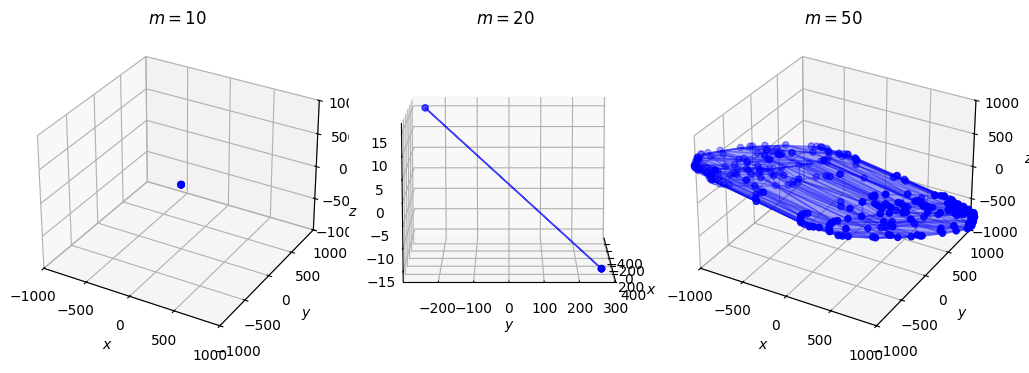

In [11]:
%matplotlib inline

fig = plt.figure(figsize=(10,20))
# fig, ax = plt.subplots(1,3)
np.random.seed(40)

p, n, m = 3, 7, 100
J = Jt.T
# J = np.random.uniform(-5,5, size=(p,n))
# N = np.random.uniform(-1,1,size=(n,m))
t_min = -np.zeros(m)
t_min = np.random.uniform(-1200, -200, size=m)
t_max = 100*np.ones(m)
t_max = np.random.uniform(200, 1200, size=m)


ax = fig.add_subplot(131, projection='3d')
ax.set_title(r"$m = 10$")
res = iterative_convex_hull_method(J.T, N[:,:10], t_min[:10], t_max[:10], tol=0.01)
P = Polytope(vertices=res[0])
plot_polytope(P, ax, color="blue", alpha=0.2)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
ax.set_xlim(-1000,1000)
ax.set_ylim(-1000,1000)
ax.set_zlim(-1000,1000)

# -----------------------
ax = fig.add_subplot(132, projection='3d')
ax.set_title(r"$m = 20$")
ax.view_init(elev=10., azim=0)

res = iterative_convex_hull_method(J.T, N[:,:20], t_min[:20], t_max[:20], tol=0.1)
P = Polytope(vertices=res[0])
plot_polytope(P, ax, color="blue", alpha=0.2)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
# ax.set_xlim(-1000,1000)
# ax.set_ylim(-1000,1000)
# ax.set_zlim(-1000,1000)


# -----------------------
ax = fig.add_subplot(133, projection='3d')
ax.set_title(r"$m = 50$")

res = iterative_convex_hull_method(J.T, N[:,:50], t_min[:50], t_max[:50], tol=0.1)
P = Polytope(vertices=res[0])
plot_polytope(P, ax, color="blue", alpha=0.2)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

ax.set_xlim(-1000,1000)
ax.set_ylim(-1000,1000)
ax.set_zlim(-1000,1000)

fig.tight_layout()
plt.show()

Visual: no faces found, calculating faces
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis


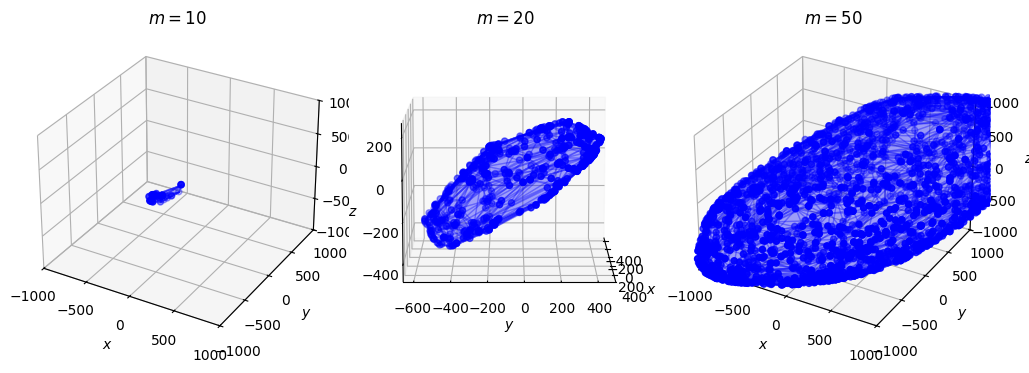

In [2]:
%matplotlib inline

fig = plt.figure(figsize=(10,20))
# fig, ax = plt.subplots(1,3)
np.random.seed(40)

p, n, m = 3, 7, 100
J = np.random.uniform(-5,5, size=(p,n))
N = np.random.uniform(-1,1,size=(n,m))
t_min = -np.zeros(m)
t_max = 100*np.ones(m)
t_max = np.random.uniform(200, 1200, size=m)


ax = fig.add_subplot(131, projection='3d')
ax.set_title(r"$m = 10$")
res = iterative_convex_hull_method(J.T, N[:,:10], t_min[:10], t_max[:10], tol=0.01)
P = Polytope(vertices=res[0])
plot_polytope(P, ax, color="blue", alpha=0.2)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
ax.set_xlim(-1000,1000)
ax.set_ylim(-1000,1000)
ax.set_zlim(-1000,1000)

# -----------------------
ax = fig.add_subplot(132, projection='3d')
ax.set_title(r"$m = 20$")
ax.view_init(elev=10., azim=0)

res = iterative_convex_hull_method(J.T, N[:,:20], t_min[:20], t_max[:20], tol=0.1)
P = Polytope(vertices=res[0])
plot_polytope(P, ax, color="blue", alpha=0.2)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
# ax.set_xlim(-1000,1000)
# ax.set_ylim(-1000,1000)
# ax.set_zlim(-1000,1000)


# -----------------------
ax = fig.add_subplot(133, projection='3d')
ax.set_title(r"$m = 50$")

res = iterative_convex_hull_method(J.T, N[:,:50], t_min[:50], t_max[:50], tol=0.1)
P = Polytope(vertices=res[0])
plot_polytope(P, ax, color="blue", alpha=0.2)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

ax.set_xlim(-1000,1000)
ax.set_ylim(-1000,1000)
ax.set_zlim(-1000,1000)

fig.tight_layout()
plt.show()

Visual: no faces found, calculating faces
using provided 3d axis
using provided 3d axis
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis
using provided 3d axis
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis
using provided 3d axis
using provided 3d axis


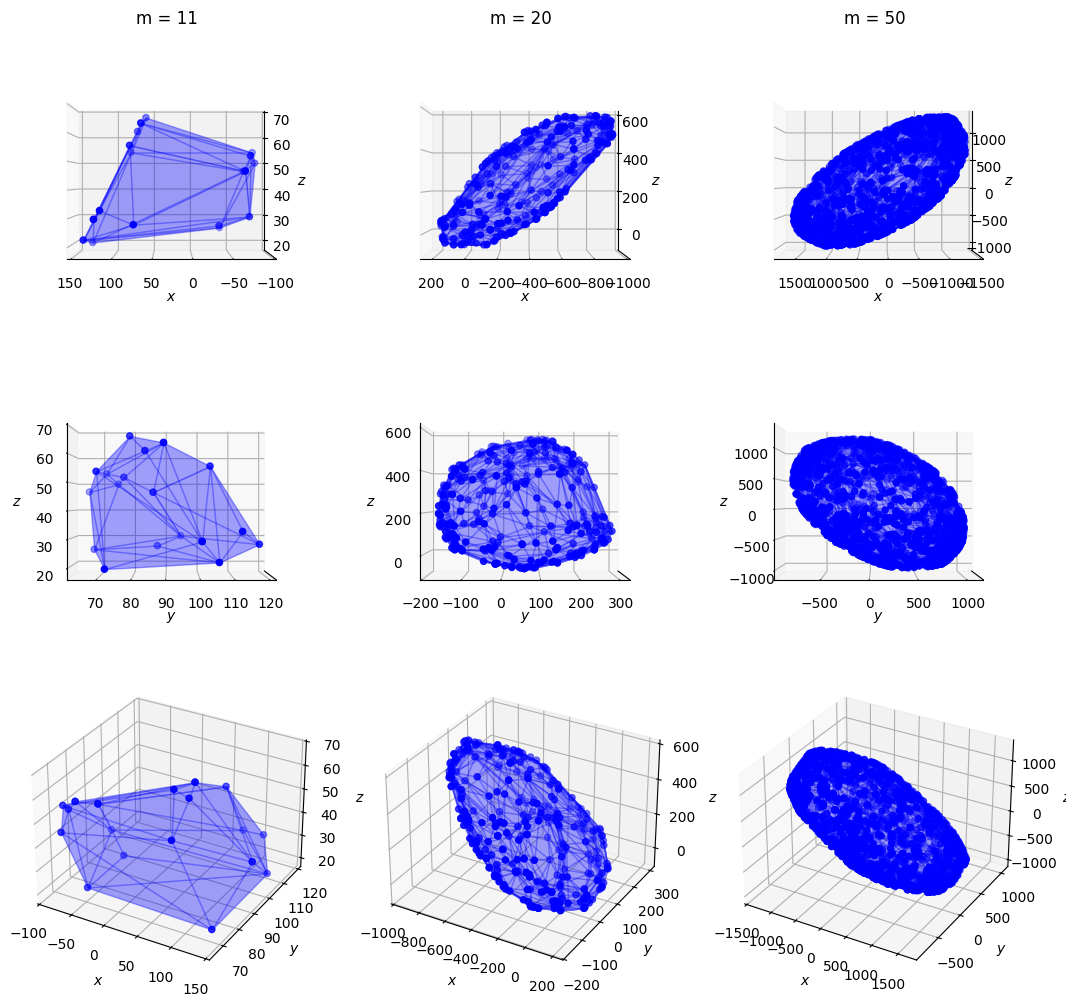

In [3]:
%matplotlib inline

# fig = plt.figure(figsize=(10,20))
fig, axes = plt.subplots(3,3, subplot_kw={"projection": "3d"})
fig.set_figheight(10)
fig.set_figwidth(11)
np.random.seed(39)

axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    # ax.set_xlim(-1000,1000)
    # ax.set_ylim(-1000,1000)
    # ax.set_zlim(-1000,1000)
    # ax.set_xticks([-1000, -500, 0, 500, 1000])
    # ax.set_yticks([-1000, -500, 0, 500, 1000])
    # ax.set_zticks([-1000, -500, 0, 500, 1000])

    if i in [0,1,2]:
        ax.view_init(elev=0., azim=90.)
        ax.set_yticks([])
        ax.set_ylabel("")
    elif i in [3,4,5]:
        ax.view_init(elev=0., azim=0)
        # ax.dist = 10
        ax.set_xticks([])
        ax.set_xlabel("")
    else:
        pass
        # ax.view_init(elev=0., azim=0)
        # ax.set_xticks([])
        # ax.set_xlabel("")
# plt.setp( ax.get_xticklabels(), visible=False)

axes[0].set_title(r'm = 11')
axes[1].set_title(r'm = 20')
axes[2].set_title(r'm = 50')

p, n, m = 3, 7, 100
J = np.random.uniform(-5,5, size=(p,n))
N = np.random.uniform(-1,1,size=(n,m))
# N[3:, :20] = 0
# N[3:6, 20:30] = 0
# N[6:, 20:40] = 0
# N[:6, 40:] = 0
t_min = np.zeros(m)
t_min = np.random.uniform(0, 90, size=m)
t_max = 100*np.ones(m)
t_max = np.random.uniform(200, 1200, size=m)
G = np.random.uniform(-100, 100, size=n)

res0 = iterative_convex_hull_method(J.T, N[:,:11], t_min[:11], t_max[:11], tol=0.01, bias=G)
P0 = Polytope(vertices=res0[0])
plot_polytope(P0, axes[0], color="blue", alpha=0.2)
plot_polytope(P0, axes[3], color="blue", alpha=0.2)
plot_polytope(P0, axes[6], color="blue", alpha=0.2)

res1 = iterative_convex_hull_method(J.T, N[:,:20], t_min[:20], t_max[:20], tol=1, bias=G)
P1 = Polytope(vertices=res1[0])
plot_polytope(P1, axes[1], color="blue", alpha=0.2)
plot_polytope(P1, axes[4], color="blue", alpha=0.2)
plot_polytope(P1, axes[7], color="blue", alpha=0.2)

res2 = iterative_convex_hull_method(J.T, N[:,:50], t_min[:50], t_max[:50], tol=1, bias=G)
P2 = Polytope(vertices=res2[0])
plot_polytope(P2, axes[2], color="blue", alpha=0.2)
plot_polytope(P2, axes[5], color="blue", alpha=0.2)
plot_polytope(P2, axes[8], color="blue", alpha=0.2)

fig.tight_layout()
# plt.show()

plt.savefig("myIma.pdf", format="pdf", bbox_inches="tight")

Visual: no faces found, calculating faces
using provided 3d axis
using provided 3d axis
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis
using provided 3d axis
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis
using provided 3d axis
using provided 3d axis


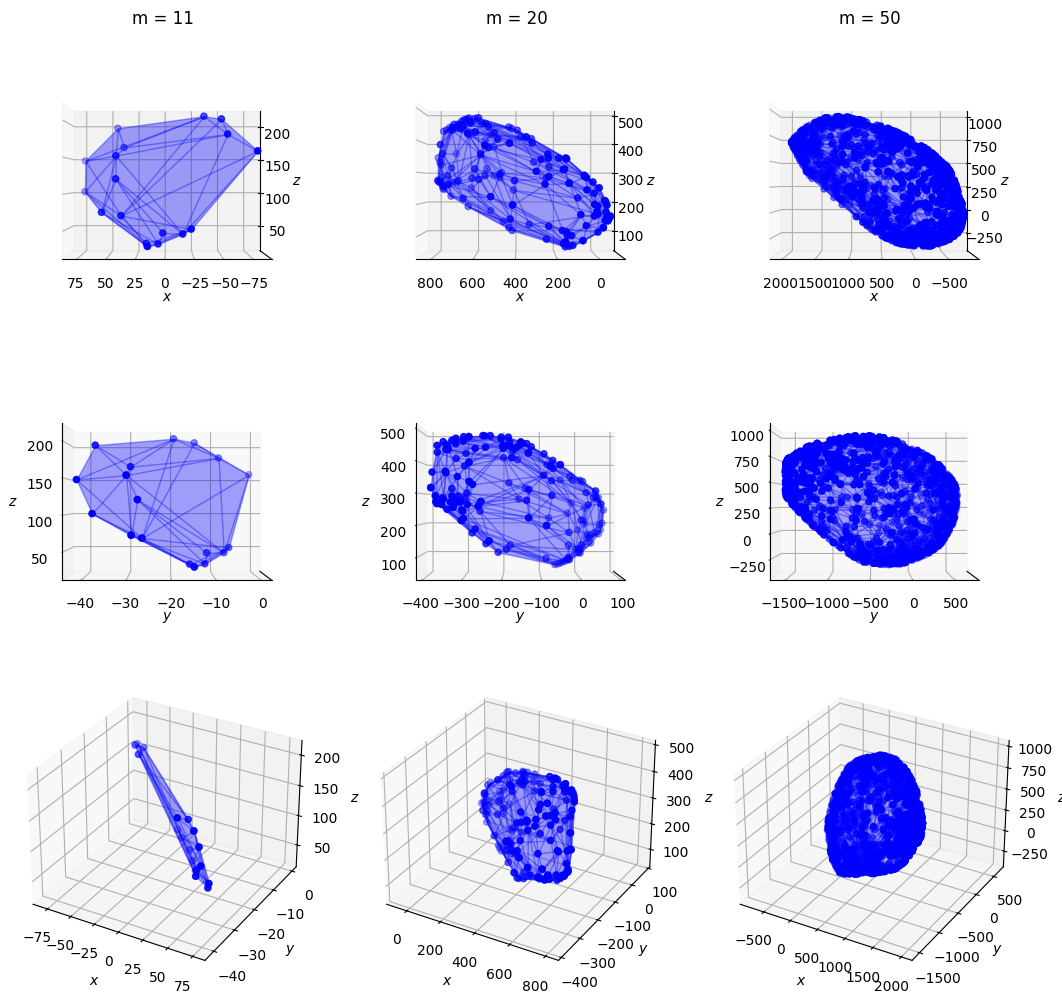

In [24]:
%matplotlib inline

# fig = plt.figure(figsize=(10,20))
fig, axes = plt.subplots(3,3, subplot_kw={"projection": "3d"})
fig.set_figheight(10)
fig.set_figwidth(11)
np.random.seed(27)

axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    # ax.set_xlim(-1000,1000)
    # ax.set_ylim(-1000,1000)
    # ax.set_zlim(-1000,1000)
    # ax.set_xticks([-1000, -500, 0, 500, 1000])
    # ax.set_yticks([-1000, -500, 0, 500, 1000])
    # ax.set_zticks([-1000, -500, 0, 500, 1000])

    if i in [0,1,2]:
        ax.view_init(elev=0., azim=90.)
        ax.set_yticks([])
        ax.set_ylabel("")
    elif i in [3,4,5]:
        ax.view_init(elev=0., azim=0)
        # ax.dist = 10
        ax.set_xticks([])
        ax.set_xlabel("")
    else:
        pass
        # ax.view_init(elev=0., azim=0)
        # ax.set_xticks([])
        # ax.set_xlabel("")
# plt.setp( ax.get_xticklabels(), visible=False)

axes[0].set_title(r'm = 11')
axes[1].set_title(r'm = 20')
axes[2].set_title(r'm = 50')

p, n, m = 3, 7, 100
J = np.random.uniform(-5,5, size=(p,n))
N = np.random.uniform(-1,1,size=(n,m))


N[3:, :7] = 0
N[6:, 15:20] = 0
N[:3, 20:35] = 0
N[6:, 20:35] = 0
N[:3, 35:45] = 0
N[:6, 45:48] = 0
N[6:, 48:] = 0
# N[3:6, 20:30] = 0
# N[6:, 20:40] = 0
# N[:6, 40:] = 0
t_min = np.zeros(m)
t_min = np.random.uniform(0, 90, size=m)
t_max = 100*np.ones(m)
t_max = np.random.uniform(200, 1200, size=m)
G = np.random.uniform(-100, 100, size=n)

res0 = iterative_convex_hull_method(J.T, N[:,:11], t_min[:11], t_max[:11], tol=0.01, bias=G)
P0 = Polytope(vertices=res0[0])
plot_polytope(P0, axes[0], color="blue", alpha=0.2)
plot_polytope(P0, axes[3], color="blue", alpha=0.2)
plot_polytope(P0, axes[6], color="blue", alpha=0.2)

res1 = iterative_convex_hull_method(J.T, N[:,:20], t_min[:20], t_max[:20], tol=1, bias=G)
P1 = Polytope(vertices=res1[0])
plot_polytope(P1, axes[1], color="blue", alpha=0.2)
plot_polytope(P1, axes[4], color="blue", alpha=0.2)
plot_polytope(P1, axes[7], color="blue", alpha=0.2)

res2 = iterative_convex_hull_method(J.T, N[:,:50], t_min[:50], t_max[:50], tol=1, bias=G)
P2 = Polytope(vertices=res2[0])
plot_polytope(P2, axes[2], color="blue", alpha=0.2)
plot_polytope(P2, axes[5], color="blue", alpha=0.2)
plot_polytope(P2, axes[8], color="blue", alpha=0.2)

fig.tight_layout()
# plt.show()

plt.savefig("myIma2.pdf", format="pdf", bbox_inches="tight")

In [26]:
15+5+15+10+5

50

In [66]:
import numpy as np
import hyperobjects as ho
from scipy.spatial import ConvexHull
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import multivariate_normal


def area(hull):
    points = hull.points
    triangles = hull.simplices
    areas = np.zeros(len(triangles))
    for i, triangle in enumerate(triangles):
        p1, p2, p3 = points[triangle]
        v1 = p2 - p1
        v2 = p3 - p1
        areas[i] = 0.5 * np.linalg.norm(np.cross(v1, v2))
    total_area = np.sum(areas)
    return total_area

def sphericity(hull):
    # https://en.wikipedia.org/wiki/Sphericity
    return np.pi**(1/3) * (6 * hull.volume)**(2/3) / area(hull)

np.random.seed(39)

p, n, m = 3, 7, 100
J = np.random.uniform(-5,5, size=(p,n))
N = np.random.uniform(-1,1,size=(n,m))
t_min = np.random.uniform(0, 90, size=m)
t_min = np.zeros(m)
t_max = 100*np.ones(m)
t_max = np.random.uniform(200, 1200, size=m)
G = np.random.uniform(-100, 100, size=n)
# G = np.zeros(n)

for i in range(10, 20):
    res = iterative_convex_hull_method(J.T, N[:,:i], t_min[:i], t_max[:i], tol=0.1, bias=G)
    hull = ConvexHull(res[0].T)
    # print(hull.volume)
    # # print(area(hull))
    # E = ho.Ellipsoid(N[:,:i])
    # # print(E.radii)
    # print(E.volume)
    # print(E.radii)
    # u,s,vt = np.linalg.svd(N[:,:i])
    # print(np.min(s)/np.max(s))
    # print(sphericity(hull))
    # Sample data

    # # Assuming you have your data points in a NumPy array 'data'
    pca = PCA(n_components=3)
    pca.fit(res[0].T)

    # # Extract ellipsoid parameters
    # center = pca.mean_
    # print(pca.explained_variance_)
    # axes_lengths = pca.explained_variance_
    # rotation_matrix = pca.components_.T
    # # print(pca.explained_variance_)
    print("Score =", pca.score(res[0].T))
    print("Explain =", sum(pca.explained_variance_), pca.explained_variance_)
    print("Explain =", sum(pca.explained_variance_ratio_), pca.explained_variance_ratio_)
    print()
    
    # break

# res1 = iterative_convex_hull_method(J.T, N[:,:20], t_min[:20], t_max[:20], tol=1, bias=G)
# P1 = Polytope(vertices=res1[0])

# res2 = iterative_convex_hull_method(J.T, N[:,:50], t_min[:50], t_max[:50], tol=1, bias=G)
# P2 = Polytope(vertices=res2[0])


Score = -14.516487401764389
Explain = 6092.519731104879 [4839.62977866 1079.06624738  173.82370506]
Explain = 1.0 [0.79435603 0.1771133  0.02853068]

Score = -16.090180852896257
Explain = 15791.162130133034 [13114.43937482  1834.64481927   842.07793604]
Explain = 0.9999999999999999 [0.83049235 0.11618175 0.0533259 ]

Score = -17.351028639358937
Explain = 30619.105984428654 [24175.29349093  3803.17948319  2640.6330103 ]
Explain = 1.0 [0.78954929 0.12420936 0.08624135]

Score = -17.85401118109407
Explain = 35389.112449099346 [24952.60895615  6079.55646107  4356.94703188]
Explain = 1.0 [0.70509282 0.17179172 0.12311546]

Score = -19.168821408987604
Explain = 91612.00959640944 [68200.01345258 13769.18357159  9642.81257223]
Explain = 1.0 [0.74444403 0.15029889 0.10525708]

Score = -19.2371103852023
Explain = 97495.99675640257 [73118.58200463 14804.01738386  9573.39736791]
Explain = 1.0 [0.74996497 0.15184231 0.09819272]

Score = -19.589602636183464
Explain = 123587.11601933083 [91479.477153